In [25]:
import pandas as pd
import matplotlib.pylab as plt

In [45]:
wine = pd.read_csv('wine.csv')
wine_index = ['kindness','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
wine.columns = wine_index
wine.head()

,kindness,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [46]:
wine["kindness"].value_counts()

2    71
1    58
3    48
Name: kindness, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A784F96CF8>,
      dtype=object)

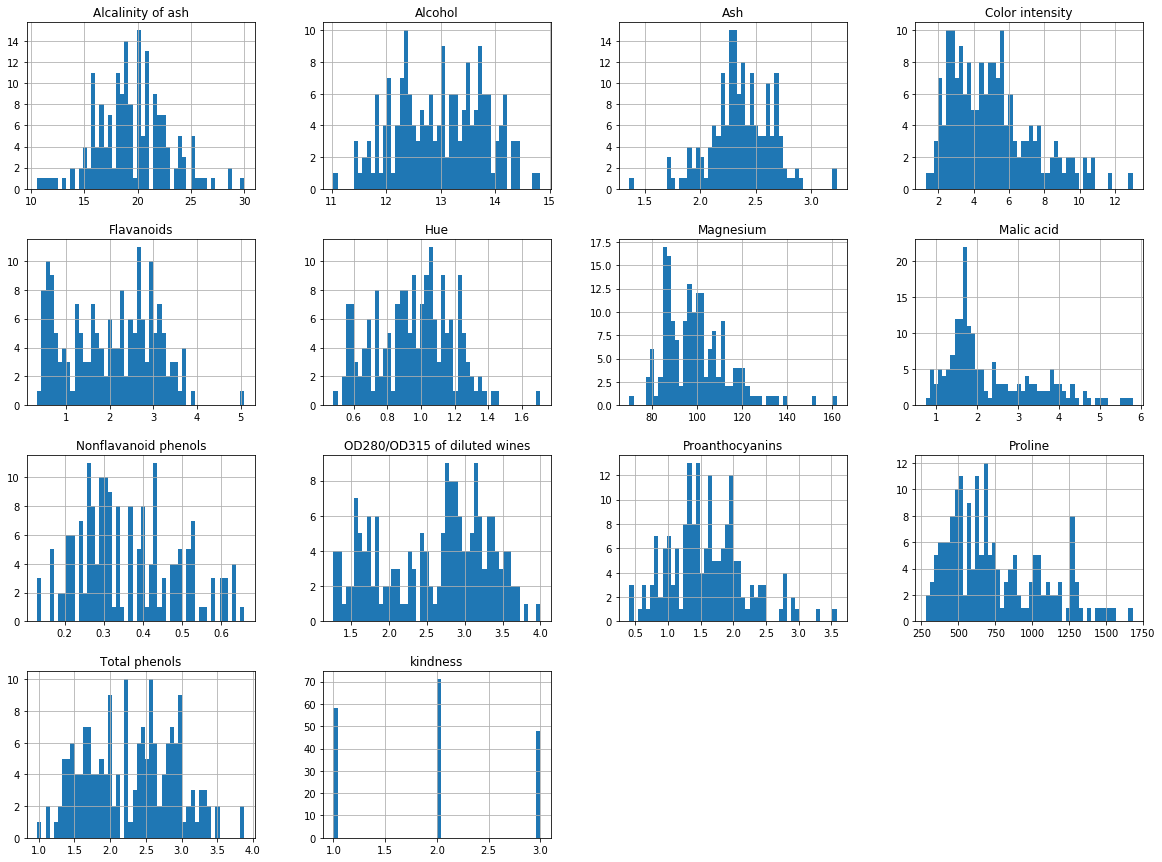

In [47]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = wine.iloc[:,1:]
y = wine.iloc[:,0]
X.shape,y.shape #X는 2차원, Y는 1차원

((177, 13), (177,))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train.shape, X_test.shape

((132, 13), (45, 13))

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train) #핏팅시키기, 학습시키기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [60]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8787878787878788, 0.6888888888888889)

In [62]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso


In [63]:
lr = Lasso().fit(X_train, y_train)

In [64]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.4191743849935954, 0.3389746224005278)

In [65]:
from sklearn.linear_model import LinearRegression, LogisticRegression #예측용/분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #분류용/예측용

In [98]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [99]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.8888888888888888)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [70]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [71]:
dt.score(X_test, y_test), rf.score(X_test,y_test)

(0.8888888888888888, 0.9555555555555556)

In [72]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.41775709,
       0.        , 0.41094655, 0.17129636])

In [73]:
rf.feature_importances_

array([0.15126653, 0.02957912, 0.01048947, 0.0283872 , 0.01895528,
       0.03944858, 0.15429702, 0.01944681, 0.01824469, 0.14560938,
       0.1088237 , 0.1236593 , 0.15179292])

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

In [78]:
gbc.score(X_train,y_train), gbc.score(X_test, y_test)

(1.0, 0.8888888888888888)

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test, y_test)

(0.9924242424242424, 0.9111111111111111)

In [81]:
from sklearn.svm import SVC, SVR #SVM-C 분류용, SVM-R 회귀용
import mglearn

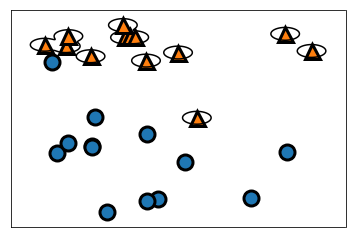

In [89]:
gamma =100#하나의 샘플이 미치는 영향의범위, 작으면 넓은 범위
c = 10 # 규제 regularization : 파라미터가 값이 작아지도록 규제
X,y =mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s =15,markeredgewidth=3)

In [93]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train,y_train), sv.score(X_test,y_test)


(1.0, 0.4)

In [85]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9090909090909091, 0.8)

In [109]:
mlp =MLPClassifier(hidden_layer_sizes=(100,40,30)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.946969696969697, 0.8)

https://www.slideshare.net/RickyPark3/6algorithm-chains-and-piplines